In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import numpy as np
from scipy.optimize import minimize, bisect

In [3]:
from dcpyps.ekdist import ekrecord
from dcpyps.ekdist import ekplot
from dcpyps import dcequations as dceq

In [4]:
rec = ekrecord.SingleChannelRecord()

In [5]:
infile = ["/DCPYPS/dcpyps/tests/AChsim.scn"]
rec.load_SCN_file(infile)

In [6]:
print(rec)

Intervals loaded from SCN file: /DCPYPS/dcpyps/tests/AChsim.scn
Total number of intervals = 13948
Resolution for HJC calculations = 0.0 microseconds
Number of resolved intervals = 13947
Number of time periods = 13947

Number of open periods = 6974
Mean and SD of open periods = 0.428573114 +/- 0.639318244 ms
Range of open periods from 0.010021283 ms to 7.095655892 ms

Number of shut intervals = 6973
Mean and SD of shut periods = 1101.849436760 +/- 1566.386461258 ms
Range of shut periods from 0.010006604 ms to 14774.831771851 ms


In [7]:
rec.tres = 20e-6
print(rec)

Intervals loaded from SCN file: /DCPYPS/dcpyps/tests/AChsim.scn
Total number of intervals = 13948
Resolution for HJC calculations = 20.0 microseconds
Number of resolved intervals = 11534
Number of time periods = 10547

Number of open periods = 5274
Mean and SD of open periods = 0.567264097 +/- 0.926454948 ms
Range of open periods from 0.020000165 ms to 10.221111763 ms

Number of shut intervals = 5273
Mean and SD of shut periods = 1456.536531448 +/- 1857.480764389 ms
Range of shut periods from 0.020004012 ms to 14919.385910034 ms


RED- Open periods
GREEN- Shut intervals
BLUE- Popen


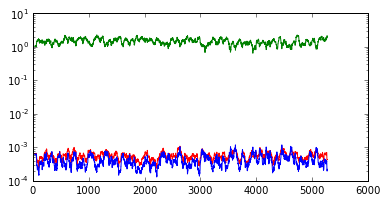

In [8]:
ekplot.plot_stability_intervals(rec)

Average open amplitude =  5.96462725256


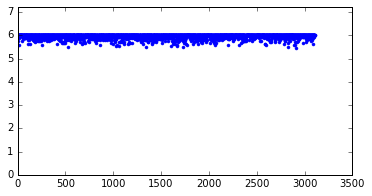

In [9]:
fc = 3000 # 3 kHz
ekplot.plot_stability_amplitudes(rec, fc, n=2)

Range of amplitudes: 5.471 - 6.000


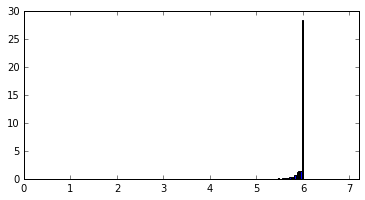

In [10]:
ekplot.plot_fitted_amplitude_histogram(rec, fc, n=2)

Mean and SD of 5274 time periods = 0.567264 +/- 0.926455 ms
	Range from 0.0200002 to 10.2211 ms


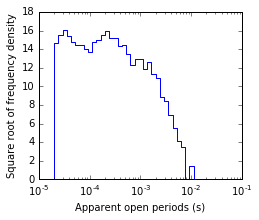

In [11]:
ekplot.plot_xlog_interval_histogram(rec.opint, rec.tres, shut=False)

Mean and SD of 5273 time periods = 1456.54 +/- 1857.48 ms
	Range from 0.020004 to 14919.4 ms


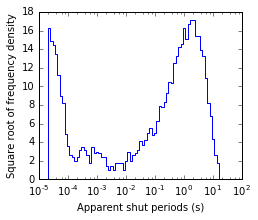

In [12]:
ekplot.plot_xlog_interval_histogram(rec.shint, rec.tres, shut=True)

## Fit multi-exponential pdf

##### Fit open period histogram

In [13]:
taus = [1e-4, 1e-3, 1e-2]
areas = [0.3, 0.3]
expPDF = dceq.MultiExponentialPDF(np.asarray(rec.opint), 
                                         taus=np.asarray(taus), areas=np.asarray(areas))
theta = expPDF.theta
print('Start LogLikelihood =', expPDF.loglik(theta))

Start LogLikelihood = -34705.692735662815


In [14]:
res = minimize(expPDF.loglik, theta, method='Nelder-Mead')
print(res)
expPDF.theta = res.x

 final_simplex: (array([[  2.06562732e-05,   1.82048894e-04,   1.20399412e-03,
          3.45942208e-01,   3.62363054e-01],
       [  2.06540350e-05,   1.82079014e-04,   1.20394071e-03,
          3.46034063e-01,   3.62312759e-01],
       [  2.06516108e-05,   1.82028288e-04,   1.20387084e-03,
          3.46001537e-01,   3.62287955e-01],
       [  2.06577991e-05,   1.82070987e-04,   1.20386081e-03,
          3.45956822e-01,   3.62330733e-01],
       [  2.06661714e-05,   1.82069718e-04,   1.20394695e-03,
          3.45962011e-01,   3.62311836e-01],
       [  2.06584388e-05,   1.82034781e-04,   1.20402232e-03,
          3.45941445e-01,   3.62386460e-01]]), array([-35888.02520218, -35888.02520042, -35888.02519492, -35888.02519139,
       -35888.02518893, -35888.02518808]))
           fun: -35888.025202176053
       message: 'Optimization terminated successfully.'
          nfev: 853
           nit: 528
        status: 0
       success: True
             x: array([  2.06562732e-05,   1.82048

Tau = 0.000021; lambda (1/s)= 48411.443437
Area= 0.345942; number = 2456.035;amplitude (1/s) = 16747.562
Tau = 0.000182; lambda (1/s)= 5493.029790
Area= 0.362363; number = 2572.616;amplitude (1/s) = 1990.471
Tau = 0.001204; lambda (1/s)= 830.568841
Area= 0.291695; number = 2070.902;amplitude (1/s) = 242.273

Overall mean = 0.000424
Predicted true number of events = 7099
Number of fitted = 5274
Number below Ylow = 1825.127; number above Yhigh = 0.426



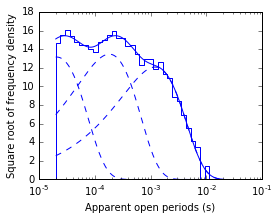

In [15]:
ekplot.plot_xlog_interval_histogram_fit(rec.opint, rec.tres, expPDF.to_plot, res.x, shut=False)
print(expPDF)

##### Fit shut period histogram

In [16]:
taus = [2e-5, 2e-3, 2]
areas = [0.3, 0.3]
expPDF = dceq.MultiExponentialPDF(np.asarray(rec.shint), 
                                         taus=np.asarray(taus), areas=np.asarray(areas))
theta = expPDF.theta
print('Start LogLikelihood =', expPDF.loglik(theta))

Start LogLikelihood = -884.273427234114


In [17]:
res = minimize(expPDF.loglik, theta, method='Nelder-Mead')
print(res)
expPDF.theta = res.x

 final_simplex: (array([[  1.70508358e-05,   5.98857133e-04,   1.94207763e+00,
          4.81769287e-01,   1.63591902e-02],
       [  1.70494368e-05,   5.99180318e-04,   1.94207393e+00,
          4.81786628e-01,   1.63635249e-02],
       [  1.70481617e-05,   5.98777350e-04,   1.94212852e+00,
          4.81796360e-01,   1.63640067e-02],
       [  1.70483602e-05,   5.98774719e-04,   1.94217626e+00,
          4.81830691e-01,   1.63565577e-02],
       [  1.70489988e-05,   5.98813249e-04,   1.94201597e+00,
          4.81833968e-01,   1.63605823e-02],
       [  1.70509153e-05,   5.98811542e-04,   1.94214598e+00,
          4.81782564e-01,   1.63652793e-02]]), array([-2728.38771707, -2728.38770969, -2728.38770757, -2728.38770687,
       -2728.38770682, -2728.38770572]))
           fun: -2728.3877170701739
       message: 'Optimization terminated successfully.'
          nfev: 363
           nit: 221
        status: 0
       success: True
             x: array([  1.70508358e-05,   5.98857133e-0

Tau = 0.000017; lambda (1/s)= 58648.151597
Area= 0.481769; number = 3811.481;amplitude (1/s) = 28254.878
Tau = 0.000599; lambda (1/s)= 1669.847355
Area= 0.016359; number = 129.424;amplitude (1/s) = 27.317
Tau = 1.942078; lambda (1/s)= 0.514912
Area= 0.501872; number = 3970.518;amplitude (1/s) = 0.258

Overall mean = 0.974691
Predicted true number of events = 7911
Number of fitted = 5273
Number below Ylow = 2636.593; number above Yhigh = 1.830



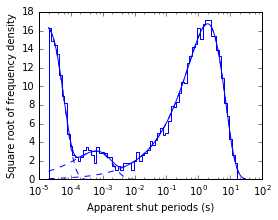

In [18]:
ekplot.plot_xlog_interval_histogram_fit(rec.shint, rec.tres, expPDF.to_plot, res.x, shut=True)
print(expPDF)

#### Calculate fitting error

In [19]:
from dcpyps.dcfits.stats import SSD, SSDlik, approximateSD, lik_intervals
from dcpyps.dcfits.simplex import Simplex

In [ ]:
simp = Simplex(SSD, pars, *(equation.to_fit, (X, Y, W)))
    result = simp.run()